prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav


The Newtonian Gravitational force is given by  $F_{g}~=~\frac{GMm}{r^2}$ 


The centripetal force on the other hand require to keep the stars in the orbit $F_{c}~=~\frac{mv^2}{r}$

Comparing the two equations
    
  $F_{c}~=~F_{g}$  
  
  
  $\frac{mv^2}{r}~=~\frac{GMm}{r^2}$   
  
  
  simplifying both sides   
  
  
  $v^2 = \frac{GM}{r}$   
  
  
   
  $v^2\propto\frac{1}{r}$ 
  
  
  That means that the square of orbital velocities of a stars is inversly proportional to there radial distance from center of galaxy.




## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/AbdulRehmanUDEL/DSPS_ARehman/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/AbdulRehmanUDEL/DSPS_ARehman/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [0]:
# to import the csv as dataframe
m31=pd.read_csv("https://raw.githubusercontent.com/AbdulRehmanUDEL/DSPS_ARehman/master/HW4/m31.csv",comment='#',delim_whitespace=False,names=["r","v","dv","err"])

In [0]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [0]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [0]:
apparentSizeM31 = 3.167 # *1 deg
distanceM31 = 778 # kpc 
distanceM31_uncert = 33 #uncertainity in distance

In [0]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.5f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05527 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [0]:
print (u"The distance of Andromeda : {:3.0f} \u00B1 {:3.0f} kpc".format(distanceM31, distanceM31_uncert))
#calculate the size of visible component
m31_size = distanceM31*(m31angS.to(u.rad)).value
m31_size_uncert = distanceM31_uncert*(m31angS.to(u.rad)).value
print(u"Size of the visible component of Andromeda : {:3.1f} \u00B1 {:3.1f} kpc".format(m31_size, m31_size_uncert) )

The distance of Andromeda : 778 ±  33 kpc
Size of the visible component of Andromeda : 43.0 ± 1.8 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [0]:
def getradii(gal, gsize, n):
    
    values_gal = gal[gal.r > n * gsize].iloc[0]
    ## Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric
    ## series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using
    ##an imaginary index position which isn’t visible in the data frame
    return values_gal.r, values_gal.err,  values_gal.v, values_gal.dv

In [0]:
gal_m31 = getradii(m31, m31_size, 1)
gal_m31

(49.222, 23.924, 237.06900000000002, 109.381)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

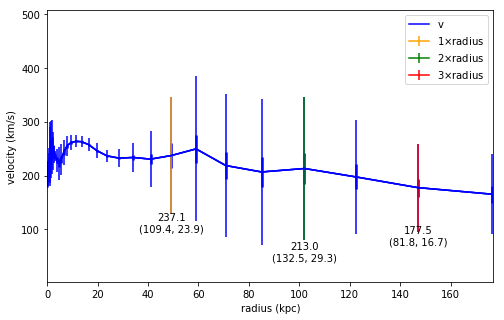

In [0]:
def plotGal(gal, rds):
    pl.figure(figsize=(8, 5))
    pl.plot(gal.r, gal.v, label='v', color='b', linewidth=1.5)
    pl.errorbar(gal.r, gal.v, gal.dv, color='b', label=None, elinewidth=1.5)
    pl.errorbar(gal.r, gal.v, gal.err, color='b', label=None, elinewidth=2.5)
    
    # values_gal.r, values_gal.err,  values_gal.v, values_gal.dv

    r_1, derr_1, v_1, dv_1 = getradii(gal, rds, 1)
    pl.errorbar(r_1, v_1, dv_1, label='%i$\\times$radius'%1, color='orange', elinewidth=1.5)
    pl.text(s='%.1f\n(%.1f, %.1f)'%(v_1, dv_1, derr_1), x=r_1, y=(v_1-1.3*dv_1), horizontalalignment='center')



    r_2, derr_2, v_2, dv_2 = getradii(gal, rds, 2)
    pl.errorbar(r_2, v_2, dv_2, label='%i$\\times$radius'%2, color='g', elinewidth=1.5)
    pl.text(s='%.1f\n(%.1f, %.1f)'%(v_2, dv_2, derr_2), x=r_2, y=(v_2-1.3*dv_2), horizontalalignment='center')

    r_3, derr_3, v_3, dv_3 = getradii(gal, rds, 3)
    pl.errorbar(r_3, v_3, dv_3, label='%i$\\times$radius'%3, color='r', elinewidth=1.5)
    pl.text(s='%.1f\n(%.1f, %.1f)'%(v_3, dv_3, derr_3), x=r_3, y=(v_3-1.3*dv_3), horizontalalignment='center')
    

    pl.xlim([0, 177])
    pl.xlabel('radius (kpc)')
    pl.ylabel('velocity (km/s)')
    pl.legend()

plotGal(m31, rds=m31_size)

### Fig: Velocities of stars in M31 as a funtion of the radius from center

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [0]:
## another way to get the data from data frame. this function is more clean then above
def getradii2(gal, gsize, n): 
    
    values_gal = gal[gal.r > n * gsize].iloc[0]
    ## Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric
    ## series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using
    ##an imaginary index position which isn’t visible in the data frame
    return values_gal

In [0]:
def vratios(gal, rds, N=[1, 2, 3], err='dv'):
    # calculate ratio of velocities
    gal_1 = getradii2(gal, rds, 1)
    expected = []
    calculated = []
    std = []
    for n in N:
        expected.append(1.0/n)
        gal_n = getradii2(gal, rds, n)
        calculated.append(gal_n.v**2 / gal_1.v**2)
        std.append(gal_n.v**2 / gal_1.v**2 * np.sqrt((2 * gal_n[err] /gal_n.v)**2 + (2 * gal_1[err] / gal_1.v)**2))
    
    df = pd.DataFrame({'N':N, 'expected':expected, 'calculated':calculated, 'calculated_std':std})  
    df['upper limit'] = df.calculated + 2*df.calculated_std
    df['lower limit'] = df.calculated - 2*df.calculated_std
    df['check'] = (df.expected<=df['upper limit']) & (df.expected>=df['lower limit'])


    return df

In [0]:
N = np.arange(1, 40)
df_dv = vratios(m31, m31_size, N, err='dv')
df_dv

,N,calculated,calculated_std,expected,upper limit,lower limit,check
0,1,1.000000,1.305005,1.000000,3.610010,-1.610010,True
1,2,0.807268,1.250178,0.500000,3.307624,-1.693088,True
2,3,0.560725,0.731105,0.333333,2.022935,-0.901485,True
3,4,0.486326,0.627925,0.250000,1.742177,-0.769525,True
4,5,0.459994,0.613439,0.200000,1.686872,-0.766883,True
5,6,0.406248,0.549795,0.166667,1.505837,-0.693342,True
6,7,0.406248,0.549795,0.142857,1.505837,-0.693342,True
7,8,0.264719,0.484817,0.125000,1.234352,-0.704914,True
8,9,0.504004,0.885104,0.111111,2.274212,-1.266203,True
9,10,0.504004,0.885104,0.100000,2.274212,-1.266203,True


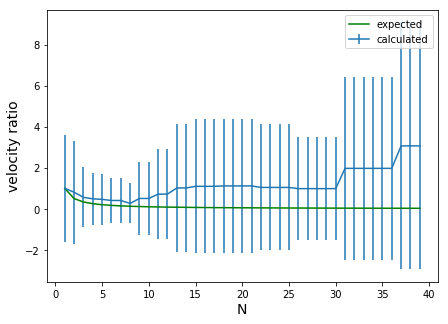

In [0]:
pl.figure(figsize=(7,5))
pl.plot(df_dv.N, df_dv.expected, '-', color = 'g', label='expected')
pl.errorbar(df_dv.N, df_dv.calculated, 2*df_dv.calculated_std, label='calculated')
pl.xlabel('N', fontsize=14)
pl.ylabel('velocity ratio', fontsize=14)
pl.legend()
pl.show()

### Fig : Expected and calculated ratio of velocities of stars in M31 galaxy taking dv in to account 

The errorbars overlap which means that the results are statistically indistinguishable at 2 sigma level.

In [0]:
# Using err instead of dv
df_err = vratios(m31, m31_size, N, err='err')
df_err

,N,calculated,calculated_std,expected,upper limit,lower limit,check
0,1,1.000000,0.285433,1.000000,1.570866,0.429134,True
1,2,0.807268,0.275576,0.500000,1.358420,0.256116,True
2,3,0.560725,0.154555,0.333333,0.869835,0.251615,True
3,4,0.486326,0.134807,0.250000,0.755939,0.216713,True
4,5,0.459994,0.159747,0.200000,0.779489,0.140499,True
5,6,0.406248,0.170867,0.166667,0.747983,0.064513,True
6,7,0.406248,0.170867,0.142857,0.747983,0.064513,True
7,8,0.264719,0.195941,0.125000,0.656601,-0.127163,True
8,9,0.504004,0.324685,0.111111,1.153374,-0.145366,True
9,10,0.504004,0.324685,0.100000,1.153374,-0.145366,True


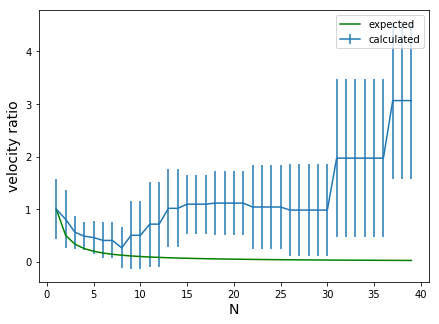

In [0]:
pl.figure(figsize=(7,5))
pl.plot(df_err.N, df_err.expected, '-', color = 'g', label='expected')
pl.errorbar(df_err.N, df_err.calculated, 2*df_err.calculated_std, label='calculated')
pl.xlabel('N', fontsize=14)
pl.ylabel('velocity ratio', fontsize=14)
pl.legend()
pl.show()

### Fig : Expected and calculated ratio of velocities of stars in M31 galaxy taking err in to account 

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [0]:
#to import data
milkyway=pd.read_csv("https://raw.githubusercontent.com/AbdulRehmanUDEL/DSPS_ARehman/master/HW4/mv.csv",comment='#',delim_whitespace=False,names=["r","v","dv","err"], skiprows=2)

In [0]:
milkyway.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [0]:
milkyway.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [0]:
#information on Milky way
mw_size = 46 #kpc
mw_size_std = 10

In [0]:
#to get smallest radius in data set that is N times the size of visible galaxy
gal_mw = getradii(milkyway, mw_size, 1)
gal_mw

(52.665, 20.165, 175.41400000000002, 56.813)

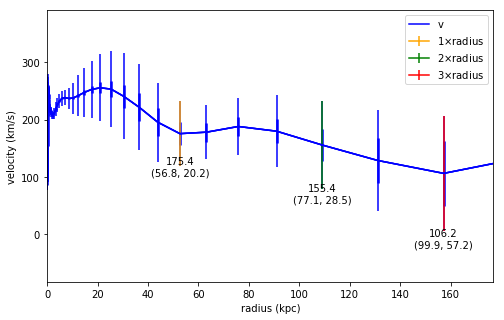

In [0]:
#to plot rotational curve of Milky way galaxy with error bars
plotGal(milkyway, rds=mw_size)


### Fig: Velocities of stars in Milky Way as a funtion of the radius from center

In [0]:
def vratios(gal, rds, N=[1, 2], err='dv'):
    # calculate ratio of velocities
    gal_1 = getradii2(gal, rds, 1)
    expected = []
    calculated = []
    std = []
    for n in N:
        expected.append(1.0/n)
        gal_n = getradii2(gal, rds, n)
        calculated.append(gal_n.v**2 / gal_1.v**2)
        std.append(gal_n.v**2 / gal_1.v**2 * np.sqrt((2 * gal_n[err] /gal_n.v)**2 + (2 * gal_1[err] / gal_1.v)**2))
    
    df = pd.DataFrame({'N':N, 'expected':expected, 'calculated':calculated, 'calculated_std':std})  
    df['upper limit'] = df.calculated + 2*df.calculated_std
    df['lower limit'] = df.calculated - 2*df.calculated_std
    df['check'] = (df.expected<=df['upper limit']) & (df.expected>=df['lower limit'])


    return df

In [0]:
N = np.arange(1, 37)
mw_dv = vratios(milkyway, mw_size, N, err='dv')
mw_dv

,N,calculated,calculated_std,expected,upper limit,lower limit,check
0,1,1.000000,0.916070,1.000000,2.832139,-0.832139,True
1,2,0.785271,0.930592,0.500000,2.646455,-1.075914,True
2,3,0.366608,0.729553,0.333333,1.825714,-1.092498,True
3,4,0.580405,1.482526,0.250000,3.545457,-2.384646,True
4,5,0.281339,0.950151,0.200000,2.181641,-1.618963,True
5,6,0.281339,0.950151,0.166667,2.181641,-1.618963,True
6,7,0.281339,0.950151,0.142857,2.181641,-1.618963,True
7,8,0.281339,0.950151,0.125000,2.181641,-1.618963,True
8,9,0.281339,0.950151,0.111111,2.181641,-1.618963,True
9,10,0.281339,0.950151,0.100000,2.181641,-1.618963,True


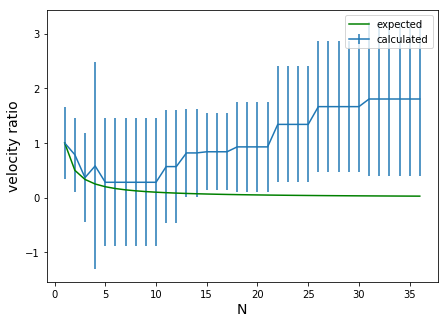

In [0]:
pl.figure(figsize=(7,5))
pl.plot(mw_dv.N, mw_dv.expected, '-', color = 'g', label='expected')
pl.errorbar(mw_dv.N, mw_dv.calculated, 2*mw_dv.calculated_std, label='calculated')
pl.xlabel('N', fontsize=14)
pl.ylabel('velocity ratio', fontsize=14)
pl.legend()
pl.show()

### Fig : Expected and calculated ratio of velocities of stars in Milky way galaxy taking dv in to account 


The errorbars does not overlap which means that the results are not statistically indistinguishable at 2 sigma level. which was what was asked for.

In [0]:
# Using err instead of dv
mw_err = vratios(milkyway, mw_size, N, err='err')
mw_err

,N,calculated,calculated_std,expected,upper limit,lower limit,check
0,1,1.000000,0.325146,1.000000,1.650293,0.349707,True
1,2,0.785271,0.340008,0.500000,1.465288,0.105254,True
2,3,0.366608,0.403639,0.333333,1.173885,-0.440669,True
3,4,0.580405,0.946525,0.250000,2.473454,-1.312644,True
4,5,0.281339,0.585877,0.200000,1.453094,-0.890416,True
5,6,0.281339,0.585877,0.166667,1.453094,-0.890416,True
6,7,0.281339,0.585877,0.142857,1.453094,-0.890416,True
7,8,0.281339,0.585877,0.125000,1.453094,-0.890416,True
8,9,0.281339,0.585877,0.111111,1.453094,-0.890416,True
9,10,0.281339,0.585877,0.100000,1.453094,-0.890416,True


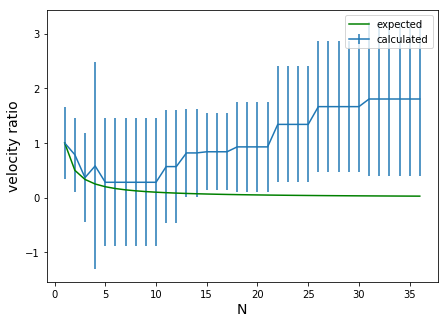

In [0]:
pl.figure(figsize=(7,5))
pl.plot(mw_err.N, mw_err.expected, '-', color = 'g', label='expected')
pl.errorbar(mw_err.N, mw_err.calculated, 2*mw_err.calculated_std, label='calculated')
pl.xlabel('N', fontsize=14)
pl.ylabel('velocity ratio', fontsize=14)
pl.legend()
pl.show()

### Fig : Expected and calculated ratio of velocities of stars in Milky Way galaxy taking err in to account 


Conclusion: From Newtonian mechanics and taking in to account all the visible matter we expect the velocity of the stars to decrease as $\frac{1}{r^2}$ as we move away from the center of the galaxy. But from the observation this is not the case. which implies that there is non luminous matter  present in the galaxy which is providing the extra gravitational force to keep the star moving at higher velocities. This was infact the evidence for Astrophysicist to believe in the existence of dark matter. 